Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing Tensorflow

In [ ]:
import tensorflow as tf

Installing Keras 

In [ ]:
!pip install -q keras

CREATE THE ANN MODEL


Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Data/Channel_Geometry/ChannelGeoData.csv')

X = dataset.iloc[:,0:2]
y = dataset.iloc[:,2:5]

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test) 

Initialising the ANN

In [ ]:
model = Sequential()

Adding the input layer and the first hidden layer

In [ ]:
model.add(Dense(output_dim = 3, init = 'he_uniform',activation='tanh',input_dim = 2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=2, units=3, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


Adding the more hidden layers and Dropout

In [ ]:
model.add(Dropout(0.2))
model.add(Dense(output_dim = 7, init = 'he_uniform',activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 5, init = 'he_uniform',activation='tanh'))
model.add(Dropout(0.2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=7, kernel_initializer="he_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=5, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.


Adding the output layer

In [ ]:
model.add(Dense(output_dim = 3, init = 'glorot_uniform', activation = 'linear'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=3, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


Defining RMSE and Soft Accuracy (for more understanding)

In [ ]:
#from keras import backend as K

#def root_mean_squared_error(y_true, y_pred):
#    return K.sqrt(K.mean(K.square(y_pred - y_true)))

#def soft_acc(y_true, y_pred):
#    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

Compiling the ANN

In [ ]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error' ,metrics=['accuracy'])

Fitting the ANN to the Training set

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size = 2, epochs = 60)

Train on 147 samples, validate on 37 samples
Epoch 1/60
147/147 [==============================] - 0s 3ms/step - loss: 1.8819 - accuracy: 0.3333 - val_loss: 1.3660 - val_accuracy: 0.3784
Epoch 2/60
147/147 [==============================] - 0s 664us/step - loss: 1.5401 - accuracy: 0.3605 - val_loss: 1.1254 - val_accuracy: 0.2973
Epoch 3/60
147/147 [==============================] - 0s 770us/step - loss: 1.4050 - accuracy: 0.3878 - val_loss: 0.9698 - val_accuracy: 0.2973
Epoch 4/60
147/147 [==============================] - 0s 689us/step - loss: 1.3021 - accuracy: 0.4354 - val_loss: 0.8809 - val_accuracy: 0.2973
Epoch 5/60
147/147 [==============================] - 0s 834us/step - loss: 1.2063 - accuracy: 0.4150 - val_loss: 0.8222 - val_accuracy: 0.3243
Epoch 6/60
147/147 [==============================] - 0s 722us/step - loss: 1.0963 - accuracy: 0.3878 - val_loss: 0.7805 - val_accuracy: 0.3784
Epoch 7/60
147/147 [==============================] - 0s 689us/step - loss: 1.0793 - accuracy

Making the predictions and evaluating the model

Predicting the Test set results

In [ ]:
y_pred = model.predict(X_test)
#y_pred = sc.inverse_transform(y_pred)
#y_test = sc.inverse_transform(y_test)

Plotting Comparison Graph

<Figure size 640x480 with 0 Axes>

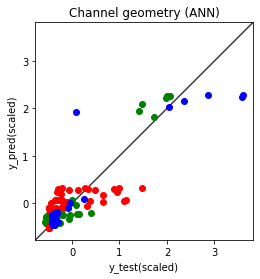

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
ax.scatter(y_test[:,0], y_pred[:,0], color = 'green')
ax.scatter(y_test[:,1], y_pred[:,1], color = 'red')
ax.scatter(y_test[:,2], y_pred[:,2], color = 'blue')
xpoints = ypoints = plt.xlim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.title('Channel geometry (ANN)')
plt.xlabel('y_test(scaled)')
plt.ylabel('y_pred(scaled)')
plt.show()

Plotting Loss during Training

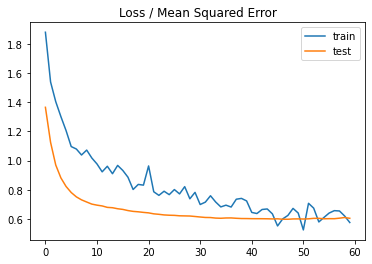

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()